### Predicting if breast cancer is benign or malignant

Importing the required libraries.

In [28]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Reading the data into a pandas dataframe and assigning the columns according to the data set description.

In [29]:
data = pd.read_csv('breast-cancer-wisconsin.data.txt', header=None)
data.columns = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
               "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses",
               "CancerType"]

In [30]:
data.head()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,CancerType
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Handling missing values

The missing value in the dataset are filled with '?' which need to be handled.

In [31]:
data.describe()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses,CancerType
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


'Bare Nuclie' is the only column which did not appear in the above table. 

In [32]:
data['BareNuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuclei, dtype: int64

'Bare Nuclie' has 16 missing values. Let us go ahead and remove them.

In [33]:
data = data[data['BareNuclei'] != '?']

In [34]:
data.dtypes

CodeNumber                   int64
ClumpThickness               int64
UniformityCellSize           int64
UniformityCellShape          int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
BlandChromatin               int64
NormalNucleoli               int64
Mitoses                      int64
CancerType                   int64
dtype: object

The column 'BareNuclei' is also not in numeric format. Let us convert it into integer.

In [35]:
data['BareNuclei'] = pd.to_numeric(data['BareNuclei'])

In [36]:
data.corr()['CancerType']

CodeNumber                 -0.084701
ClumpThickness              0.714790
UniformityCellSize          0.820801
UniformityCellShape         0.821891
MarginalAdhesion            0.706294
SingleEpithelialCellSize    0.690958
BareNuclei                  0.822696
BlandChromatin              0.758228
NormalNucleoli              0.718677
Mitoses                     0.423448
CancerType                  1.000000
Name: CancerType, dtype: float64

We vaj see that the colum 'CancerType' has high correlation with all columns except CodeNumber which has no significance and needs to be removed.

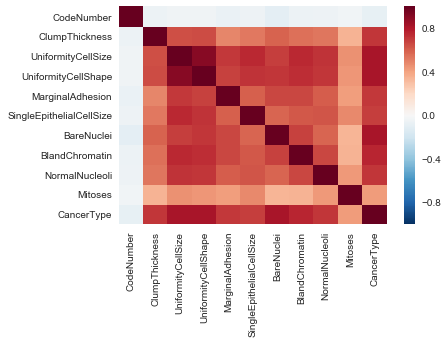

In [37]:
sns.heatmap(data.corr())

Splitting the data into X featues and y labels.

In [38]:
X = data[["ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion","SingleEpithelialCellSize", 
         "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses"]]
y = data["CancerType"]

### Building a decision tree classifier

Let us build a simple decision trees classifier. We start by splitting the data into training and test sets.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1) 

Let's try both the gini index and entropy as the criteria and check the accuracy.

In [40]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth =2, min_samples_leaf = 5)

In [41]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [42]:
predictions = clf_gini.predict(X_test)

In [43]:
print('test_accuracy:', accuracy_score(predictions, y_test))
print('training_accuracy:', accuracy_score(clf_gini.predict(X_train), y_train))

test_accuracy: 0.951219512195
training_accuracy: 0.951882845188


In [44]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth=5, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)
predictions = clf_entropy.predict(X_test)
print('test_accuracy:', accuracy_score(predictions, y_test))
print('training_accuracy:', accuracy_score(clf_entropy.predict(X_train), y_train))

test_accuracy: 0.960975609756
training_accuracy: 0.97489539749


### Building a random forest classifier

Let's build a Random forest classifier to improve this accuracy. Tuning the max_depth parameter using a bunch of values.

In [45]:
for md in [1,2,3,4,5,6,7,8,9,10,11]:
    clf_rf = RandomForestClassifier(max_depth = md, random_state =1, min_samples_leaf =4)
    clf_rf.fit(X_train, y_train)
    predictions  = clf_rf.predict(X_test)
    print(md, accuracy_score(predictions,y_test))

1 0.946341463415
2 0.970731707317
3 0.965853658537
4 0.970731707317
5 0.970731707317
6 0.970731707317
7 0.970731707317
8 0.970731707317
9 0.970731707317
10 0.970731707317
11 0.970731707317


It looks like trees of depths 4 onwards give the best accuracy. Thus keeping max_depth as 4.

In [46]:
clf_rf = RandomForestClassifier(max_depth = 4, random_state =1, min_samples_leaf =4)
clf_rf.fit(X_train, y_train)
predictions  = clf_rf.predict(X_test)
print('test_accuracy:', accuracy_score(predictions, y_test))
print('training_accuracy:', accuracy_score(clf_entropy.predict(X_train), y_train))

test_accuracy: 0.970731707317
training_accuracy: 0.97489539749


Thus we can predict if a breast cancer is benign or malignant with an accuracy of 97.07 percent.